<a href="https://colab.research.google.com/github/ashutosh-619/Working-On-Common-Datasets/blob/main/Mall_Customers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.shape

(200, 5)

In [4]:
#Let's check a few statistical properties of the dataset.
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
#A few things to notice are that the ages of the customers range from 18 to 70 and that the average annual income is $15k.
#And also the average spending score is 50.2

In [6]:
#Now let us see whether our data has any missing values.
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
#Looks like there aren't any missing values so that's a great thing.
#We'll now check the number of males and females that shop at the mall.
df['Genre'].value_counts()

Female    112
Male       88
Name: Genre, dtype: int64

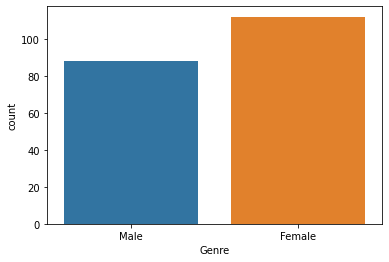

In [8]:
#The numbe of females is higher as compared to the number of males.
#We can also visualize this using a count plot.
sns.countplot(x='Genre', data=df)

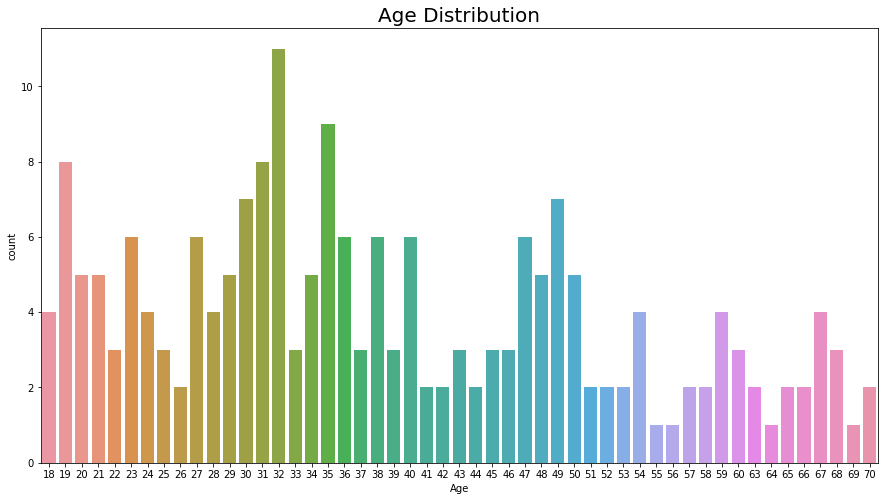

In [9]:
#Plotting a distribution of age to see in what range most of the customers fall in.
plt.figure(figsize=(15,8))
sns.countplot(x='Age', data=df)
plt.title('Age Distribution', fontsize=20)
plt.show()

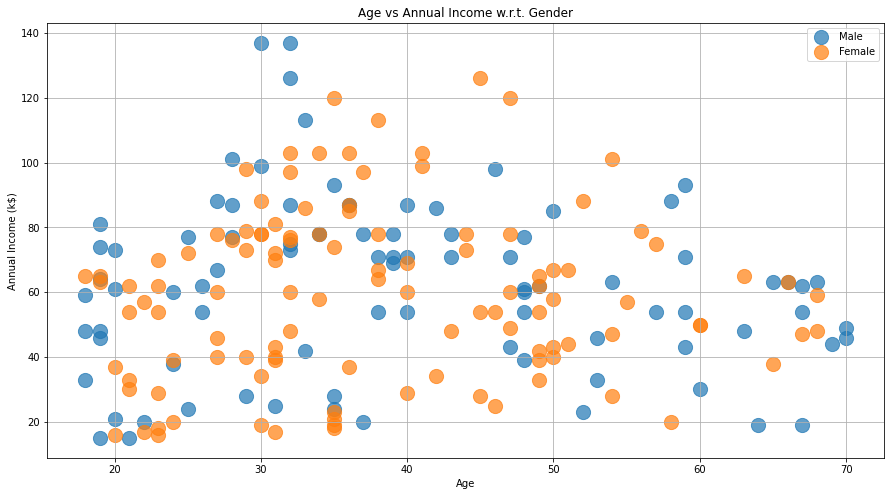

In [10]:
#It can be seen that a high number of customers lie in the range of 30-40 years!
#To actually find out how much different people earn at different ages, we'll plot Age vs Annual Income.
plt.figure(figsize=(15,8))
for gender in ['Male', 'Female']:
  plt.scatter(x='Age', y='Annual Income (k$)', data=df[df['Genre'] == gender], s=200, alpha=0.7, label=gender)
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.title('Age vs Annual Income w.r.t. Gender')
plt.grid()
plt.legend()
plt.show()

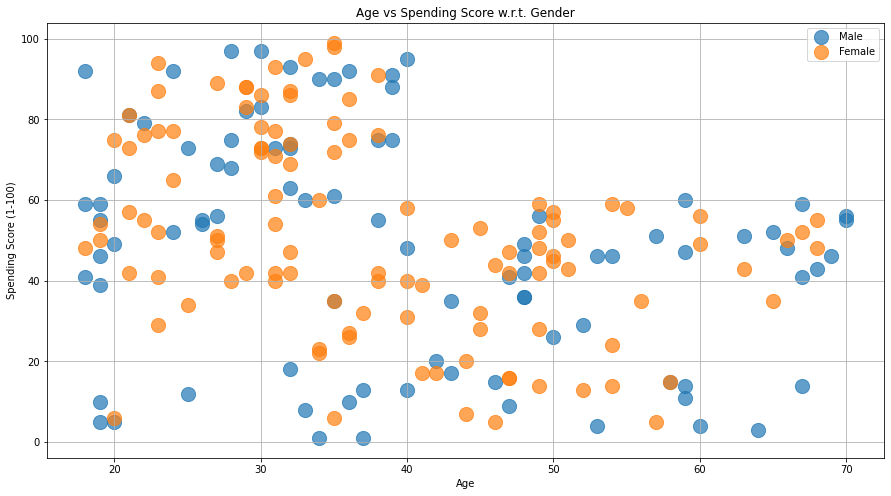

In [11]:
#One can observe that customers having ages between 25 to 40 earn the most.
plt.figure(figsize=(15,8))
for gender in ['Male', 'Female']:
  plt.scatter(x='Age', y='Spending Score (1-100)', data=df[df['Genre'] == gender], s=200, alpha=0.7, label=gender)
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.title('Age vs Spending Score w.r.t. Gender')
plt.grid()
plt.legend()
plt.show()

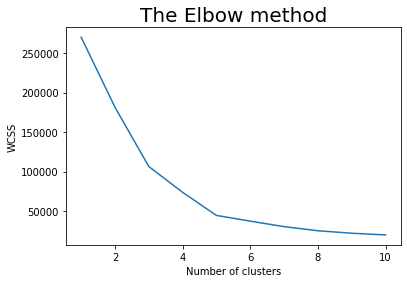

In [12]:
#Once again, we can notice that people between ages 20-40 tend to spend the most!
#Now, we'll finally take the first step towards clustering, i.e., finding the optimal number of clusters.
#This is done using the Elbow method.

X = df.iloc[:, [3,4]].values

from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 221)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow method', fontsize = 20)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [13]:
#Thus, we can see that the optimal number of clusters is 5.
#So, now we'll choose this value as k and move forward.
model = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 221)
y_kmeans = model.fit_predict(X)

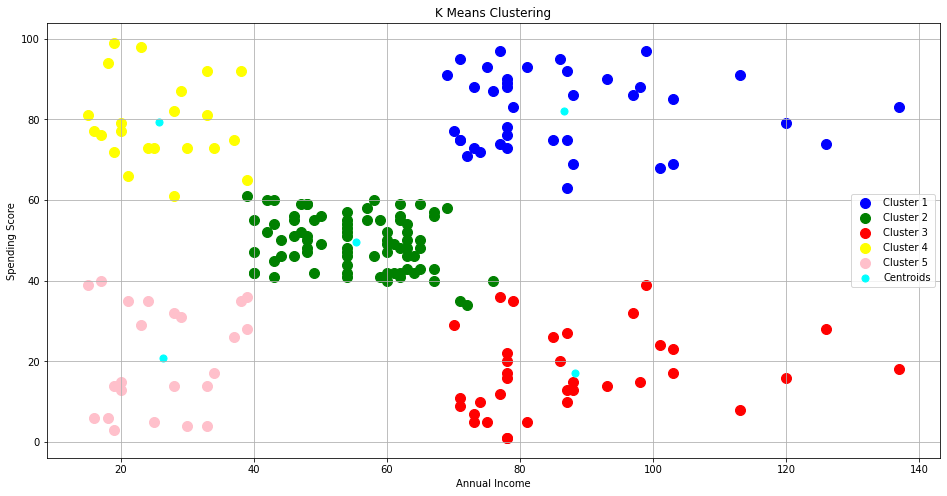

In [14]:
#We'll now visualize the clusters.
plt.figure(figsize=(16,8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'green', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'red', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'yellow', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'pink', label = 'Cluster 5')
#We also plot the centroids of these clusters.
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:,1], s = 50, c = 'cyan', label = 'Centroids')

plt.title('K Means Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

The clusters clearly show the five varied type of customers that shop at the mall.

**Cluster 5 above groups those whose income is less and they also spend less, whereas, Cluster 4 groups those customers whose income is less yet they spend a lot!**

**Cluster 1 consists of people whose income and spending score both are high. And cluster 2 is of those people who have high income yet the spend less.**

**Taking these observations into consideration, the mall should clearly target more at people who belong to clusters 1 and 4!**